## Chapter 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 2.20

In [14]:
def tentmap(a,fakt,N):
    eta1 = a * (2**(-0.5) - 0.5)
    meas = np.zeros((N*10,2))
    
    for i in range(N*10):
        if ((eta1 >= -a/2) and (eta1 < 0)):
            eta1 = (fakt * eta1 + 0.5 * a)
        else:
            eta1 = (-fakt * eta1 + 0.5 * a)
        meas[i] = [i, eta1]
    
    measerr = meas[::10,1]
    return measerr

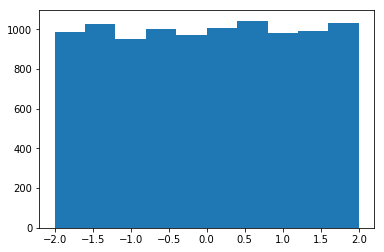

In [16]:
a = 4
fakt = 1.99999
N = 10**4

measerr = tentmap(a,fakt,N)

fig0 = plt.figure()
plt.hist(measerr)
plt.show()

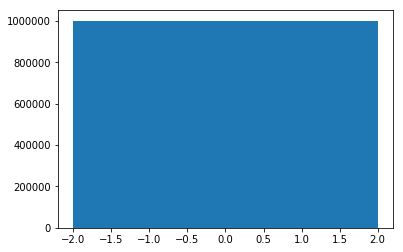

In [18]:
N = 10**7

measerr = tentmap(a,fakt,N)

fig1 = plt.figure()
plt.hist(measerr)
plt.show()

In [20]:
error = np.zeros((N/20))
j1 = 1

for i in range(N/20):
    error[i] = np.mean(measerr[j1:j1+20])
    j1 += 20

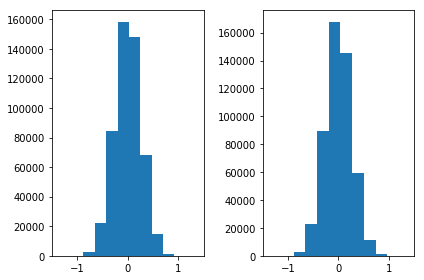

In [29]:
fig2 = plt.figure()
plt.subplot(1, 2, 1)
plt.hist(error)
plt.xlim(-1.5,1.5)

sim = np.sqrt(1./15) * np.random.randn(N/20)
plt.subplot(1, 2, 2)
plt.hist(sim)
plt.xlim(-1.5,1.5)

plt.tight_layout()
plt.show()

In [72]:
maxtau = 25
xi = measerr
C = np.zeros((maxtau, 2))

C[0] = 1.

j = 1
for tau in range(1,maxtau):
    xi1 = xi[tau:]
    xi2 = xi[:-tau]
    nn = xi**2
    cc = np.sum(xi1 * xi2) / np.sum(nn[:-tau])
    C[j] = [tau, cc]
    j += 1

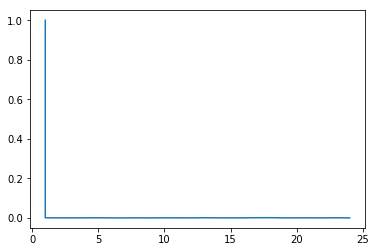

In [73]:
fig3 = plt.figure()
plt.plot(C[:,0],C[:,1])
plt.show()

### Example 2.21

In [8]:
# Taken from the example in Chap 1.

sigma = 10.
rho = 28.
beta = 8./3
dt = 0.001
a = 1./np.sqrt(dt)

fakt = 1.99999
N = 2 * 10**5

x = -.587
y = -.563
z = 16.870

g1 = a * (1./np.sqrt(2) - 0.5)
g2 = a * (1./np.sqrt(3) - 0.5)
g3 = a * (1./np.sqrt(5) - 0.5)

res = np.zeros((N,7))

for i in range(N):
    res[i] = [i-1, x, y, z, g1, g2, g3]
    
    if ((g1 >= -a/2) and (g1 <0)):
        g1 = a * (fakt * g1 / a + 0.5)
    else:
        g1 = a * (-fakt * g1 / a + 0.5)
        
    if ((g2 >= -a/2) and (g2 < 0)):
        g2 = a * (fakt * g2 / a + 0.5)
    else:
        g2 = a * (-fakt * g2 / a + 0.5)
    
    if ((g3 >= -a/2) and (g3 < 0)):
        g3 = a * (fakt * g3 / a + 0.5)
    else:
        g3 = a * (-fakt * g3 / a + 0.5)
        
    xn = x + dt * ((sigma * (y - x)) + dt * g1)
    yn = y + dt * ((x * (rho - z) - y) + dt * g2)
    zn = z + dt * ((x * y - beta * z) + dt * g3)
    
    x = xn
    y = yn
    z = zn

res[:,0] *= dt

meas = np.zeros((N*4,2))
a = 4.
fakt = 1.99999
eta1 = a * (2**(-1./2) - 0.5)

for i in range(N*4):
    if ((eta1 >= -a/2) and (eta1 < 0)):
        eta1 = (fakt * eta1 + 0.5 * a)
    else:
        eta1 = (-fakt * eta1 + 0.5 * a)
    meas[i] = [i+1, eta1]
    
measerr = meas[:,1][::10]

Nout = 50
obsx = np.zeros((N/Nout,3))

j=0
i=0

for k in range(1,N,Nout):
    err = 1./20 * np.sum(measerr[j:j+20])
    obsx[i] = [res[k,0], res[k,1], err]
    i += 1
    j += 20

obs = np.array([obsx[:,0], obsx[:,1]+obsx[:,2]])

p = 4
k = 1 # number of steps for forward prediction

Data_Points = obs.shape[1]
STEPS = Data_Points/2 + 1 - k

y = obs[1][:STEPS]

A = np.zeros((STEPS-p-k, p+1))

for i in range(p+1):
    #print("p-i = %i, i = %i, STEPS-p-1+i = %i" %(p-i,i, STEPS-p-1+i))
    A[:,i] = (y[i:STEPS-p-k+i])

b = obs[1][p+k:STEPS]

c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,b))

res = b - np.dot(A,c)

jj = 0
RMSE = 0
y_obs = np.zeros((STEPS - 1))
time = np.zeros((STEPS - 1))
y_predict = np.zeros((STEPS - 1))

for i in range(Data_Points/2, Data_Points/2 + STEPS - 1):
    yn = obs[1][i-p:i+1]
    predn = np.dot(yn.T,c)
    y_obs[jj] = obs[1][i+k]
    time[jj] = 0.05*(i+k)
    y_predict[jj] = predn
    RMSE += (predn-obsx[:,1][i+k])**2
    jj += 1
    
Res = y_obs - y_predict

residual mean = 0.0576
residual variance squared = 1.0111
residual skewness = -0.0284
residual kurtosis = 0.1857


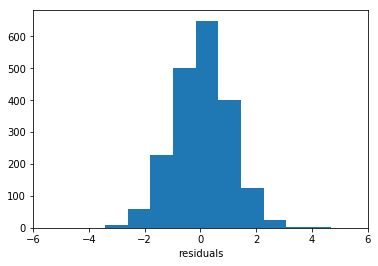

In [27]:
J = Res.shape[0]
rbar = 1./J * np.sum(Res)
print("residual mean = %.4f"  %rbar)
var = 1./(J - 1) * np.sum((Res - rbar)**2)
print("residual variance squared = %.4f" %var)
skewness = 1./(J * var**3) * np.sum((Res - rbar)**3)
print("residual skewness = %.4f" %skewness)
kurtosis = 1./(J * var**4) * np.sum((Res - rbar)**4) - 3.
print("residual kurtosis = %.4f" %kurtosis)

fig4 = plt.figure()
plt.hist(Res)
plt.xlim(-6,6)
plt.xlabel("residuals")
plt.show()

### Example 2.29

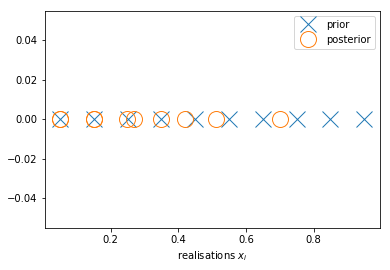

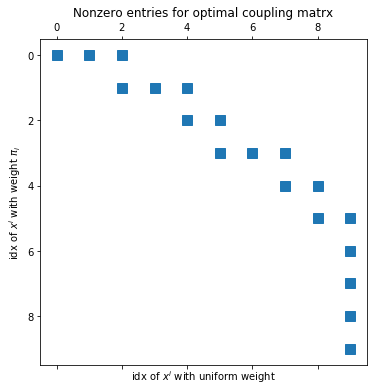

In [99]:
from scipy.sparse import lil_matrix, find

M = 10
xf = np.arange(0.5,M+.1-0.5)/M
xf = np.sort(xf)

R = 0.1
yobs = 0.1

w = np.exp(-(xf - yobs)**2 / (R * 2.))
w /= w.sum()

T = lil_matrix((M,M))
j = 0
i = 0
dx = np.ones(M)/M
dy = w

while i*j <= (M-1)*(M-1):
    if dy[i] < dx[j]:
        T[i,j] = dy[i]
        dx[j] = dx[j] - dy[i]
        dy[i] = 0
        i += 1
    else:
        T[i,j] = dx[j]
        dy[i] = dy[i] - dx[j]
        dx[j] = 0
        j += 1

# posterior
xa = xf.T * T *M

fig5 = plt.figure()
plt.plot(xf,np.zeros((xf.shape[0])),'x',label='prior', ms=16)
plt.plot(xa,np.zeros((xa.shape[0])),'o',label='posterior', mfc='none', ms=16)
plt.xlabel(r'realisations $x_i$')
plt.legend()
plt.show()

i,j,s = find(T)

fig6 = plt.figure(figsize=(6,6))
plt.spy(T)
plt.title('Nonzero entries for optimal coupling matrx')
plt.xlabel(r'idx of $x^i$ with uniform weight')
plt.ylabel(r'idx of $x^i$ with weight $\pi_i$')
plt.show()

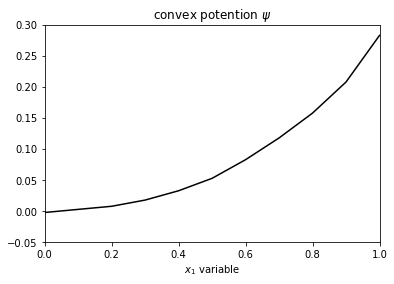

In [129]:
xgrid = np.arange(0,1.1,.1)

l1 = xf[0] * (xgrid - xf[0])
a1 = xf[0] * (xf[2] - xf[0])
l2 = xf[1] * (xgrid - xf[2]) + a1
a2 = xf[1]*(xf[4]-xf[2])
l3 = xf[2]*(xgrid-xf[4]) + a1 + a2;
a3 = xf[2]*(xf[5]-xf[4]);
l4 = xf[3]*(xgrid-xf[5]) + a1 + a2 + a3;
a4 = xf[3]*(xf[7]-xf[5]);
l5 = xf[4]*(xgrid-xf[7]) + a1 + a2 + a3 + a4;
a5 = xf[4]*(xf[8]-xf[7]);
l6 = xf[5]*(xgrid-xf[8]) + a1 + a2 + a3 + a4 + a5;
a6 = xf[5]*(xf[9]-xf[8]);
l7 = xf[9]*(xgrid-xf[9]) + a1 + a2 + a3 + a4 + a5 + a6;

Ls = np.array([l1,l2,l3,l4,l5,l6,l7])

fig7 = plt.figure()
plt.plot(xgrid,Ls.max(axis=0), 'k')
plt.ylim([-0.05,.3])
plt.xlim([0,1.])
plt.xlabel(r'$x_1$ variable')
plt.title(r'convex potention $\psi$')
plt.show()